<a href="https://colab.research.google.com/github/Rishit2611/CC-FEBRUARY-DATA_SCIENCE-/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [ ]:
loan = pd.read_csv('Loan_Data.csv')

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# checking for null values in all the columns
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# deleting columns which arent useful
loan.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
# changing datatype of the credit history column
loan['Credit_History']=loan['Credit_History'].astype(object)
# checking datatypes again
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [ ]:
loan['Loan_Status'].value_counts() #checking the status of loans

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

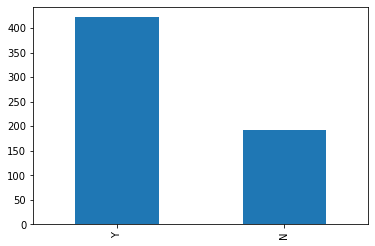

In [ ]:
loan['Loan_Status'].value_counts().plot(kind='bar') #plotting the distribution on a bar graph

In [ ]:
# checking the unique values in credit history column
loan['Credit_History'].unique()

array([1.0, 0.0, nan], dtype=object)

In [ ]:
# checking null values in loan amount column
loan[loan['LoanAmount'].isnull()]
# checking index of the rows with null values
drop_index=loan[loan['LoanAmount'].isnull()].index
# dropping null values in the loan amount column
loan.drop(drop_index,axis=0,inplace=True)
# checking for null values in loan amount column
loan['LoanAmount'].isnull().sum()

0

In [ ]:
# checking null values in Credit_History column
loan[loan['Credit_History'].isnull()]
# checking index of the rows with null values
drop_index=loan[loan['Credit_History'].isnull()].index
# dropping null values in the Credit_History column
loan.drop(drop_index,axis=0,inplace=True)
# checking for null values in Credit_History column
loan['Credit_History'].isnull().sum()

0

In [ ]:
# checking for values in loan amount term column
loan['Loan_Amount_Term'].unique()
# looking for null values
loan[loan['Loan_Amount_Term'].isnull()]
loan['Loan_Amount_Term'].describe()


count    529.000000
mean     342.351607
std       64.861662
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

0

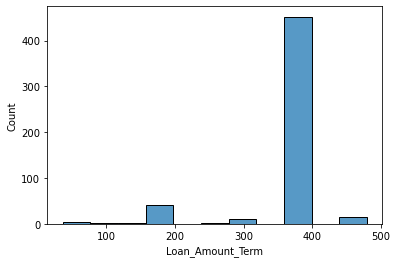

In [ ]:
# checking distribution
sns.histplot(x=loan['Loan_Amount_Term'], data= loan)
# replacing null values with the mean duration
loan['Loan_Amount_Term'].fillna(value=loan['Loan_Amount_Term'].mean(),inplace=True)
# checking for null values
loan['Loan_Amount_Term'].isnull().sum()

In [ ]:
# deleting the null values in other columns as it contains only binary classes
loan.dropna(axis=0,inplace=True)
# checking null values for entire dataframe
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# selecting all the categorical columns
categorical_columns=loan.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

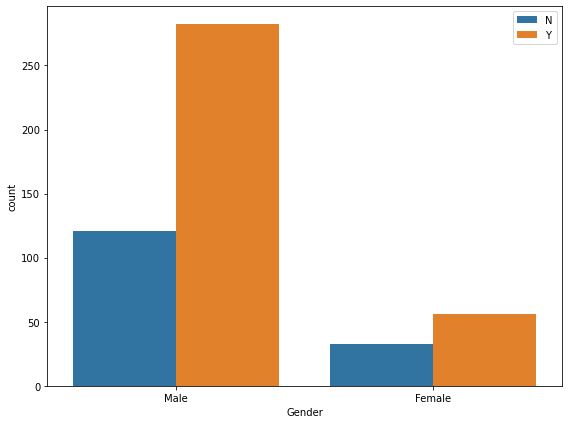

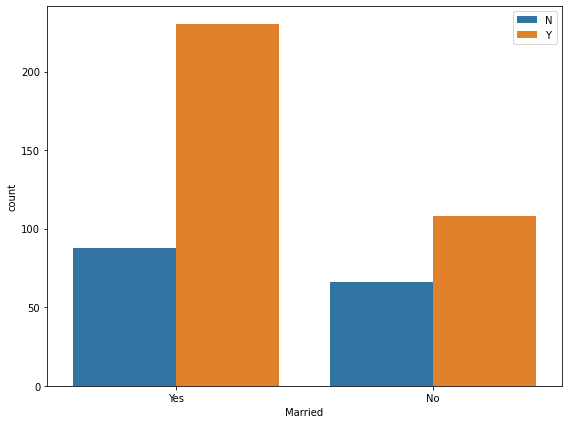

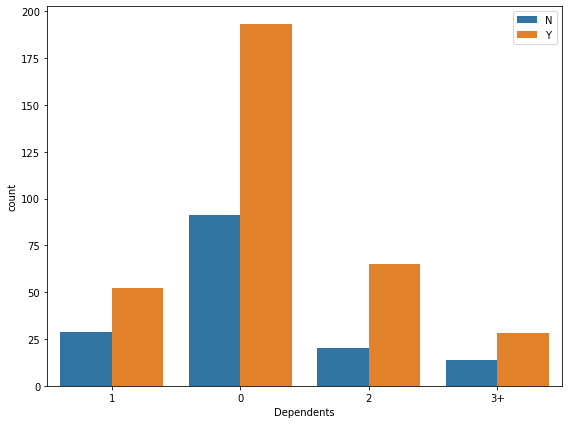

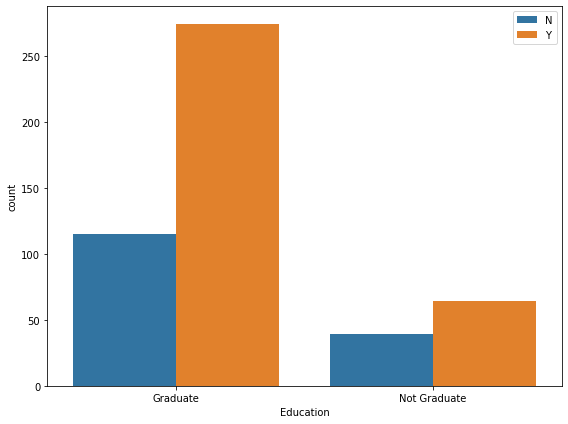

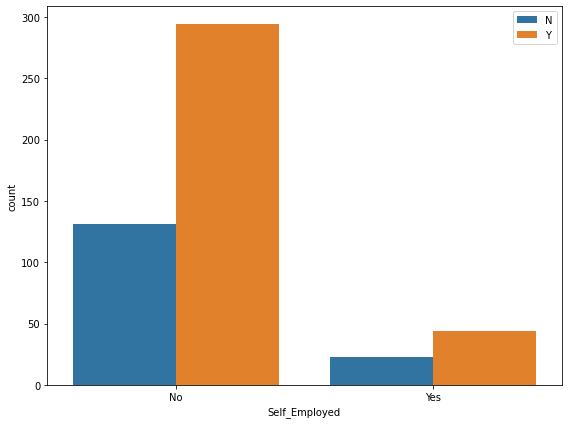

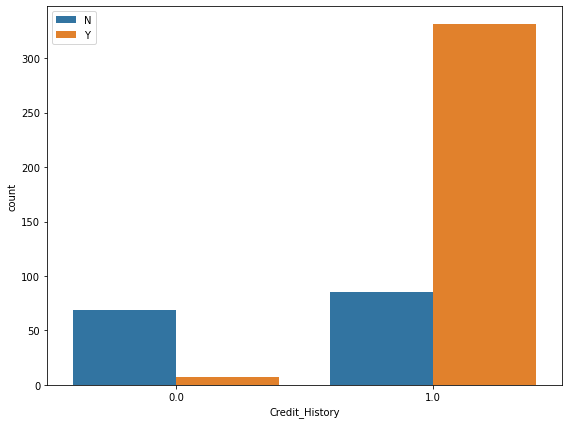

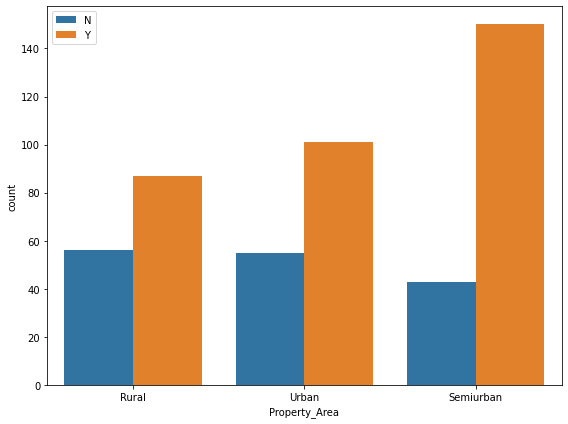

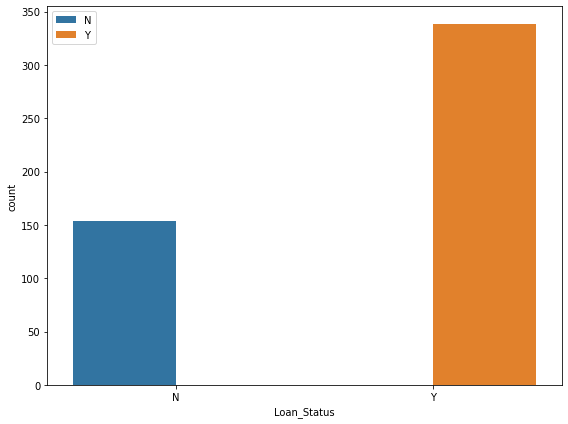

In [ ]:
# plotting the categorical features and checking loan status 
for i in categorical_columns:
    fig = plt.figure(figsize=(8,6))
    sns.countplot(x=loan[i],hue=loan['Loan_Status'])
    plt.legend()
    plt.tight_layout()

In [ ]:
# converting binary features in numerical labels for prediction
loan['Loan_Status']=np.where(loan['Loan_Status']=='N',0,1)
loan['Gender']=np.where(loan['Gender']=='Male',1,0)
loan['Married']=np.where(loan['Married']=='No',0,1)
loan['Education']=np.where(loan['Education']=='Not Graduate',0,1)
loan['Self_Employed']=np.where(loan['Self_Employed']=='No',0,1)

In [ ]:
# generating labels for each property type
loan = pd.get_dummies(loan,drop_first=False)
loan

C:\Users\gaya\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,0,0,1,0,0,0,1,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,0,0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1,1,0,0,0,0,1,0,0,1
4,1,0,1,0,6000,0.0,141.0,360.0,1,1,0,0,0,0,1,0,0,1
5,1,1,1,1,5417,4196.0,267.0,360.0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1,1,0,0,0,0,1,1,0,0
610,1,1,1,0,4106,0.0,40.0,180.0,1,0,0,0,1,0,1,1,0,0
611,1,1,1,0,8072,240.0,253.0,360.0,1,0,1,0,0,0,1,0,0,1
612,1,1,1,0,7583,0.0,187.0,360.0,1,0,0,1,0,0,1,0,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# selecting dependent feature
y = loan['Loan_Status']
#selecting independent features
X = loan.drop('Loan_Status',axis=1)

In [ ]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,0,1,0,0,0,1,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1,0,0,0,0,1,0,0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1,0,0,0,0,1,0,0,1
4,1,0,1,0,6000,0.0,141.0,360.0,1,0,0,0,0,1,0,0,1
5,1,1,1,1,5417,4196.0,267.0,360.0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1,0,0,0,0,1,1,0,0
610,1,1,1,0,4106,0.0,40.0,180.0,0,0,0,1,0,1,1,0,0
611,1,1,1,0,8072,240.0,253.0,360.0,0,1,0,0,0,1,0,0,1
612,1,1,1,0,7583,0.0,187.0,360.0,0,0,1,0,0,1,0,0,1


In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# scaling the dataset
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
# implementing logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train_norm,y_train)
prediction=classifier.predict(X_test_norm)

In [ ]:
# importing classification tests
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
report=classification_report(y_test,prediction)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.46      0.62        52
           1       0.77      0.98      0.86        96

    accuracy                           0.80       148
   macro avg       0.85      0.72      0.74       148
weighted avg       0.82      0.80      0.78       148



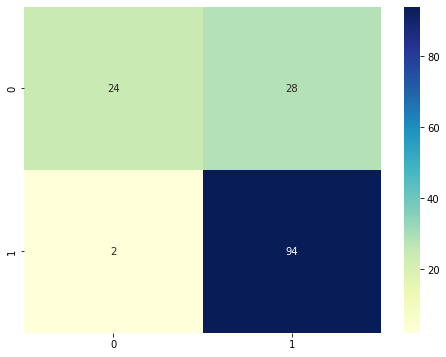

In [ ]:
ConfusionMatrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8,6))
ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='YlGnBu')


In [ ]:
accuracy_score(y_test,prediction)

0.7972972972972973

In [ ]:
columns = loan.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Loan_Status"]]
# Store the variable we are predicting 
target = "Loan_Status"
# Define a random state 
state = np.random.RandomState(42)
X = loan[columns]
Y = loan[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(492, 17)
(492,)


In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
import collections



In [ ]:
sampler= RandomOverSampler(sampling_strategy=0.5)
X_train_res,Y_train_res = sampler.fit_resample(X, Y)
X_train_res.shape,Y_train_res.shape
print('Original dataset shape {}'.format(collections.Counter(Y)))
print('Resampled dataset shape {}'.format(collections.Counter(Y_train_res)))

Original dataset shape Counter({1: 338, 0: 154})
Resampled dataset shape Counter({1: 338, 0: 169})


In [ ]:
X_train_res=pd.get_dummies(X_train_res,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_train_res,Y_train_res, test_size= 0.3,random_state=0)
scaler.fit(X_train)
X_scaled_res = scaler.transform(X_train)
scaler.fit(X_test)
X_test_res = scaler.transform(X_test)
classifier.fit(X_scaled_res,y_train)
prediction_res = classifier.predict(X_test_res)



In [ ]:
report=classification_report(y_test,prediction_res)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        60
           1       0.74      0.98      0.84        93

    accuracy                           0.78       153
   macro avg       0.84      0.72      0.73       153
weighted avg       0.82      0.78      0.76       153



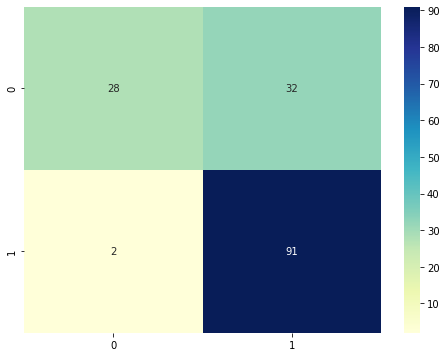

In [ ]:
ConfusionMatrix = confusion_matrix(y_test, prediction_res)
plt.figure(figsize=(8,6))
ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='YlGnBu')
